### Required:
1)Which variables are significant in predicting the demand for shared bikes   
2)How well those variables describe the bike demands
3) 

## data dictionary  
    instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [250]:
print(sm.__version__)


0.14.2


In [4]:
bike=pd.read_csv('day.csv')
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#dropping the instant column because it is redundant and dteday column because yr and month are given
bike=bike.drop(columns='dteday')
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
col=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual','registered']

### EDA (Bivariate Analysis)

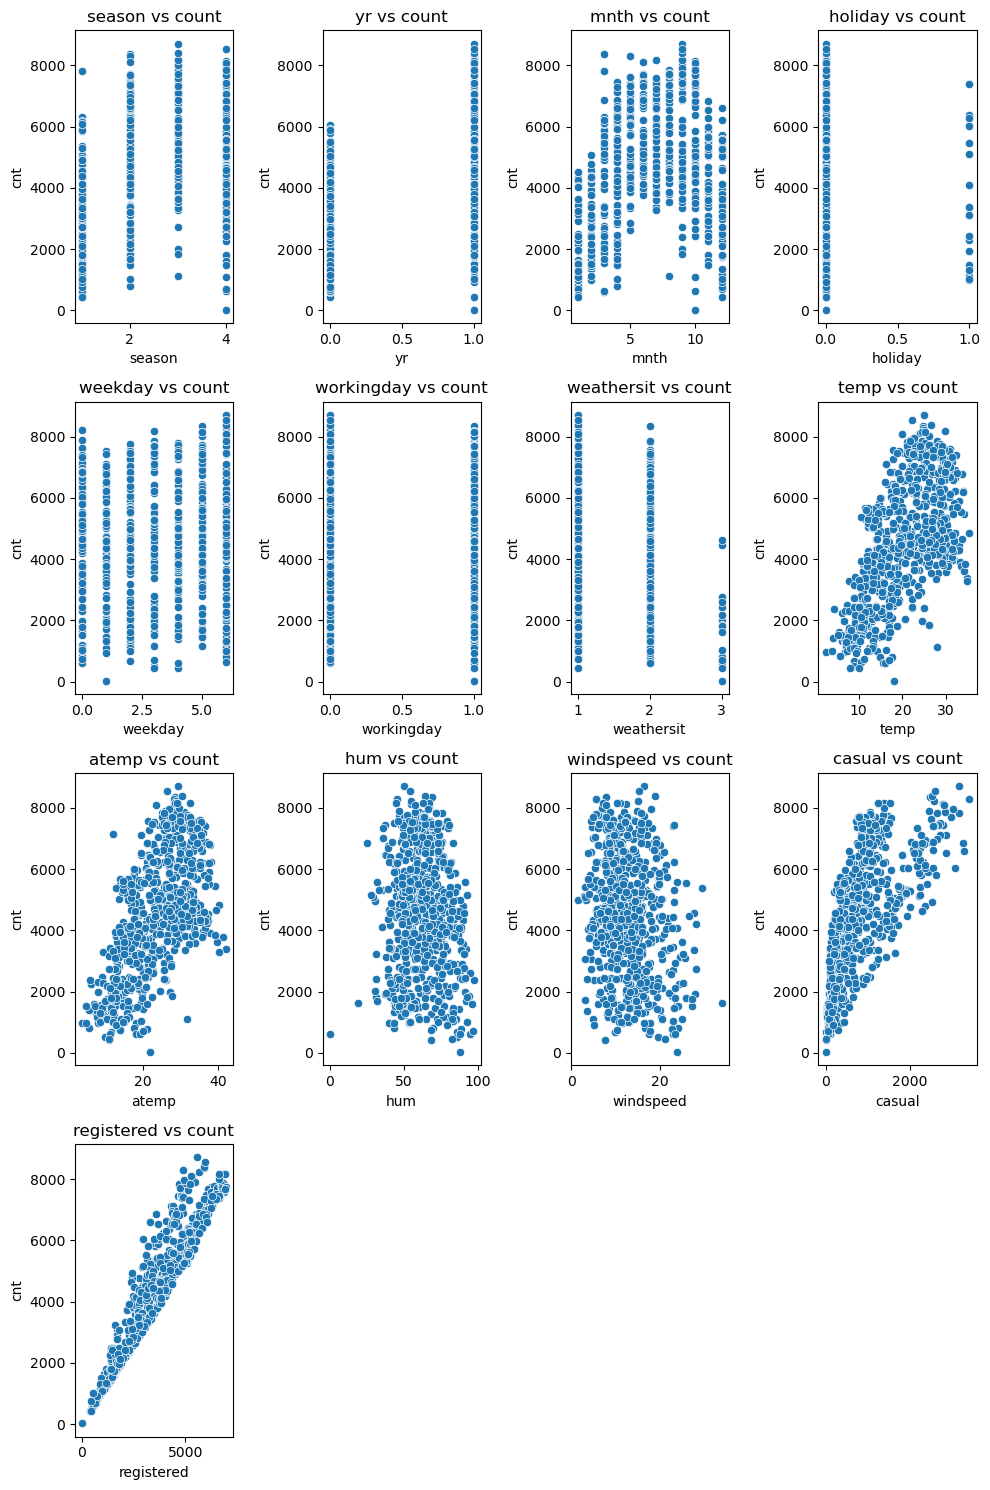

In [10]:
plt.figure(figsize=(10,15))
for i,value in enumerate(col):
    plt.subplot(4,4,i+1)
    plt.title("{} vs count".format(value))
    sns.scatterplot(data=bike, x=value, y=bike['cnt'])
plt.tight_layout()
plt.show()

### Inferences:
1) The year 2019 had more count of rental bookings
2) Working days had significantly more bike bookings than holidays
3) With respect to weather situation, days with Light Snow, Light Rain, Thunderstorm and Scattered clouds had the lowest bookings as seen from the plot
4) September had the highest number of bookings ever.

#### It can be observed from the plots that 'temp', 'atemp', 'casual' and 'registered' have a linear relationship with target variable with 'casual' and 'registered' being strongly related

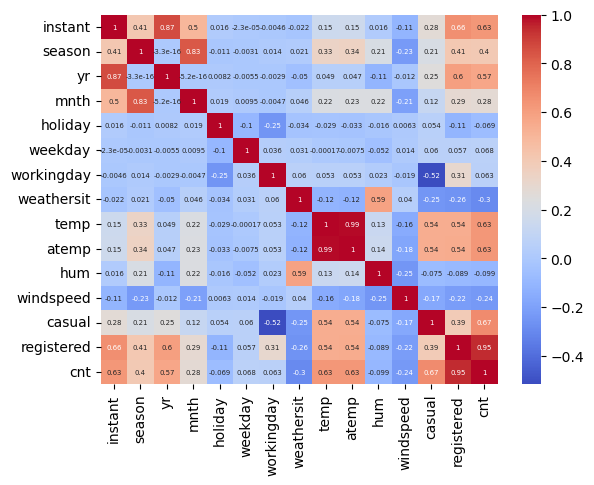

In [12]:
#checking for multicollinearity
sns.heatmap(data=bike.corr(), cmap='coolwarm', annot=True, annot_kws={'size': 5})
plt.show()

### dropping season because it is highly correlated with month and season can be derived from month

### dropping atemp instead of temp because only temp can be sufficient and they are highly correlated

### But first lets build the model with all variables and then double check with VIF

In [16]:
X=bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered']]
y=bike['cnt']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [83]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [95]:
X_train_scaled_df=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df=pd.DataFrame(X_test_scaled, columns=X_test.columns)

### VIF iteration 1

In [97]:
vif=pd.DataFrame()
vif['Features']=[i for i in X.columns]
vif['VIF_score']=[variance_inflation_factor(X_train_scaled_df.values, i) for i in range(X.shape[1])]
vif

,Features,VIF_score
0,season,4.068918
1,yr,2.791048
2,mnth,3.357232
3,holiday,1.110825
4,weekday,1.057627
5,workingday,3.337968
6,weathersit,1.891941
7,temp,55.571760
8,atemp,56.750531
9,hum,1.915479


## First iterative model lr_1 consists of all predictors

In [113]:
X_train_scaled_df.reset_index(drop=True, inplace=True)
X_test_scaled_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [115]:
X_train_sm=sm.add_constant(X_train_scaled_df)
X_test_sm=sm.add_constant(X_test_scaled_df)
lr_1=sm.OLS(y_train, X_train_sm).fit()
y_test_pred=lr_1.predict(X_test_sm)
y_train_pred=lr_1.predict(X_train_sm)

In [117]:
r2_test=r2_score(y_test,y_test_pred)
r2_train=r2_score(y_train,y_train_pred)
r2_test, r2_train

(1.0, 1.0)

In [119]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.955e+31
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:27:01   Log-Likelihood:                 14886.
No. Observations:                 584   AIC:                        -2.974e+04
Df Residuals:                     570   BIC:                        -2.968e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671   8.63e-14   5.22e+16      0.000    4505.267    4505.267
season        8.1e-13   1.74e-13      4.653      0.000    4.68e-13    1.15e-12
yr          3.411e-13   1.44e-13      2.365      0.018    5.78e-14    6.24e-13
mnth       -1.108e-12   1.58e-13     -7.009      0.000   -1.42e-12   -7.98e-13
holiday    -6.963e-13    9.1e-14     -7.655      0.000   -8.75e-13   -5.18e-13
weekday    -3.695e-13   8.88e-14     -4.163      0.000   -5.44e-13   -1.95e-13
workingday -8.527e-14   1.58e-13     -0.541      0.589   -3.95e-13    2.24e-13
weathersit -8.811e-13   1.19e-13     -7.422      0.000   -1.11e-12   -6.48e-13
temp       -6.821e-13   6.43e-13     -1.060      0.290   -1.95e-12    5.82e-13
atemp       9.095e-13    6.5e-13      1.399      0.162   -3.68e-13    2.19e-12
hum        -4.547e-13   1.19e-13     -3.807      0.000   -6.89e-13    -2.2e-13
windspeed   1.421e-14   9.78e-14      0.145      0.884   -1.78e-13    2.06e-13
casual       673.9195   1.67e-13   4.04e+15      0.000     673.919     673.919
registered  1594.0058   2.21e-13   7.23e+15      0.000    1594.006    1594.006
==============================================================================
Omnibus:                        2.273   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.351
Skew:                           0.137   Prob(JB):                        0.309
Kurtosis:                       2.853   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### r2 score of 1 indicates overfitting, carry out 2nd iteration of VIF



1) Dropping high VIF variables and retaining the alternative/similar variables
- drop atemp instead of temp
- drop registered instead of casual
- drop month instead of season for model simplicity even though lower vif value
- drop windspeed because very high P-value

In [143]:
X_train_2=X_train_scaled_df.drop(columns=['atemp','registered','mnth','windspeed'])
X_train_2.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,casual
0,-1.339807,0.972968,-0.167836,-0.464412,0.705291,-0.732361,-1.884077,-1.351866,-1.124647
1,1.339807,0.972968,-0.167836,0.523627,0.705291,-0.732361,-0.306750,-1.193941,-0.019173
2,-1.339807,-1.027783,-0.167836,-0.958431,0.705291,-0.732361,-0.417439,-1.819690,-0.948068
3,1.339807,0.972968,-0.167836,1.017646,0.705291,1.111168,-0.938605,0.957450,-0.738844
4,-1.339807,0.972968,-0.167836,-1.452451,-1.417854,-0.732361,-1.791834,-1.509791,-0.835294


In [145]:
X_test_2=X_test_scaled_df.drop(columns=['atemp','registered','mnth','windspeed'])
X_test_2.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,casual
0,0.446602,-1.027783,5.958188,-0.958431,-1.417854,1.111168,1.307476,0.054583,3.291311
1,-0.446602,0.972968,-0.167836,0.029607,0.705291,-0.732361,1.616483,-0.273196,0.037213
2,1.339807,-1.027783,-0.167836,0.523627,0.705291,1.111168,-0.113043,1.306081,-0.900584
3,0.446602,-1.027783,-0.167836,0.029607,0.705291,-0.732361,1.528856,-1.474034,0.055020
4,-0.446602,-1.027783,-0.167836,0.523627,0.705291,-0.732361,1.242905,-2.326247,-0.164591


## 2nd iterative model lr_2 consists of 'season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit','temp', 'hum', 'casual'

In [148]:
X_train_2_sm=sm.add_constant(X_train_2)  
X_test_2_sm=sm.add_constant(X_test_2)
lr_2=sm.OLS(y_train,X_train_2_sm).fit()
y_test_pred_2=lr_2.predict(X_test_2_sm)
y_train_pred_2=lr_2.predict(X_train_2_sm)

In [152]:
r2_test_2=r2_score(y_test,y_test_pred_2)
r2_train_2=r2_score(y_train,y_train_pred_2)
r2_test_2,r2_train_2

(0.8657992201321563, 0.8936296527162663)

In [154]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     535.8
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          1.19e-272
Time:                        13:47:00   Log-Likelihood:                -4600.6
No. Observations:                 584   AIC:                             9221.
Df Residuals:                     574   BIC:                             9265.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     26.640    169.118      0.000    4452.944    4557.591
season       437.5586     28.965     15.106      0.000     380.668     494.449
yr           793.3578     28.511     27.827      0.000     737.360     849.356
holiday      -13.4677     27.999     -0.481      0.631     -68.461      41.525
weekday       65.0453     27.117      2.399      0.017      11.785     118.306
workingday   718.6561     38.264     18.782      0.000     643.502     793.811
weathersit  -280.9165     34.427     -8.160      0.000    -348.535    -213.298
temp         354.1459     39.555      8.953      0.000     276.455     431.837
hum            6.0727     34.793      0.175      0.862     -62.264      74.410
casual      1114.1317     47.680     23.367      0.000    1020.484    1207.779
==============================================================================
Omnibus:                      123.227   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.917
Skew:                          -0.968   Prob(JB):                     3.58e-90
Kurtosis:                       6.630   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The model now has a reliable r2 score value on both train and test sets due to dropping high VIF and P-value variables

### VIF iteration 2

In [157]:
vif_2=pd.DataFrame()
vif_2['Features']=X_train_2.columns
vif_2['VIF_score']=[variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif_2

,Features,VIF_score
0,season,1.182190
1,yr,1.145377
2,holiday,1.104647
3,weekday,1.036133
4,workingday,2.063086
5,weathersit,1.670091
6,temp,2.204687
7,hum,1.705768
8,casual,3.203318


#### Dropping variable 'hum'(humidity) because it has high VIF and P-value and can be inferred from the variable 'weathersit', and also dropping 'holiday' because it has high P-value, meaning it is not a statistically significant predictor.

In [159]:
X_train_3=X_train_2.drop(columns=['hum','holiday'])
X_test_3=X_test_2.drop(columns=['hum','holiday'])

In [161]:
X_train_3_sm=sm.add_constant(X_train_3)
X_test_3_sm=sm.add_constant(X_test_3)
lr_3=sm.OLS(y_train,X_train_3_sm).fit()
y_test_pred_3=lr_3.predict(X_test_3_sm)
y_train_pred_3=lr_3.predict(X_train_3_sm)

In [163]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     690.9
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          1.97e-275
Time:                        13:48:08   Log-Likelihood:                -4600.7
No. Observations:                 584   AIC:                             9217.
Df Residuals:                     576   BIC:                             9252.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     26.600    169.373      0.000    4453.023    4557.511
season       438.2785     28.448     15.406      0.000     382.404     494.153
yr           791.7653     28.234     28.043      0.000     736.311     847.220
weekday       65.4857     26.935      2.431      0.015      12.583     118.388
workingday   723.6677     36.648     19.747      0.000     651.688     795.647
weathersit  -276.3705     27.715     -9.972      0.000    -330.804    -221.937
temp         353.9660     38.764      9.131      0.000     277.831     430.101
casual      1117.6435     46.894     23.833      0.000    1025.539    1209.748
==============================================================================
Omnibus:                      124.819   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.039
Skew:                          -0.981   Prob(JB):                     2.76e-91
Kurtosis:                       6.645   Cond. No.                         3.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Since all the variables have appropriate P>t values with no change in Adjusted R2 and an increase in f-statistic, we can conclude that the model lr_3 is a good fitted model

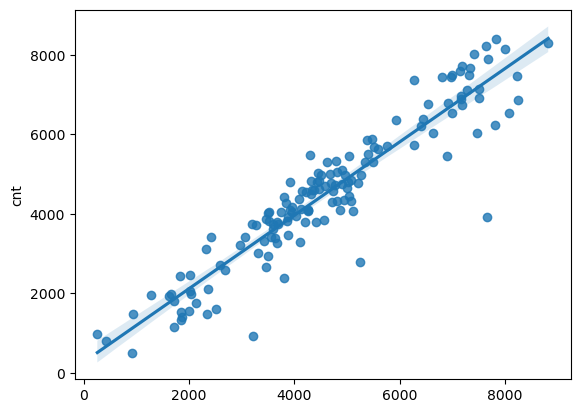

In [165]:
sns.regplot(x=y_test_pred_3, y=y_test)
plt.show()

### We can see that the regression line captures the variance properly.

### Checking the assumption of MLR - residuals being normally distributed

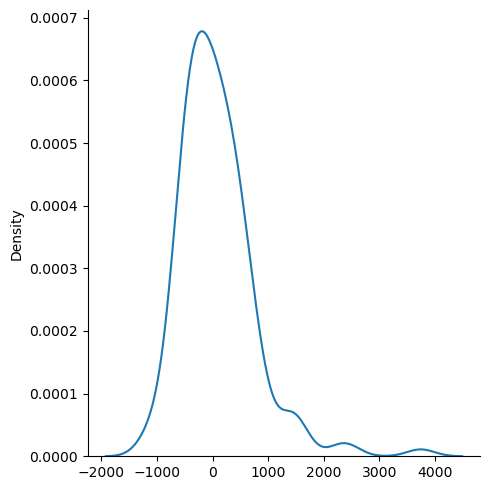

In [167]:
residual=y_test_pred_3-y_test
sns.displot(residual, kind='kde')
plt.show()

### We can see that the errors are normally distributed around 0 satisfying the property of LR
    - Therefore we have obtained the best fitted line with 8 predictor variables which are aligned with the business and technical aspect of the problem statement
    - The coefficients of the line are given below

In [188]:
print(list(lr_3.params))

[4505.267123287671, 438.278504651007, 791.765291109081, 65.48573593556864, 723.6676664668752, -276.37053023025635, 353.9660149927869, 1117.643472050141]


### Ranking the predictors based on their coefficients

In [182]:
X_train_3.columns

Index(['season', 'yr', 'weekday', 'workingday', 'weathersit', 'temp',
       'casual'],
      dtype='object')

In [217]:
rank_df=pd.DataFrame({'Features':X_train_3_sm.columns,'Coefficients':lr_3.params}).sort_values(by='Coefficients', ascending=False)
rank_df

,Features,Coefficients
const,const,4505.267123
casual,casual,1117.643472
yr,yr,791.765291
workingday,workingday,723.667666
season,season,438.278505
temp,temp,353.966015
weekday,weekday,65.485736
weathersit,weathersit,-276.370530


### Variables which are significant in predicting demand for Bikes

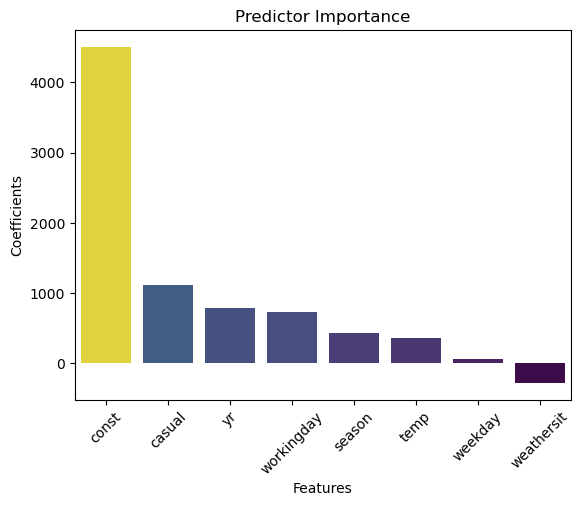

In [227]:
sns.barplot(x='Features', y='Coefficients', data=rank_df,hue='Coefficients', palette='viridis', legend=False)
#plt.bar(data=rank_df,x='Rank',y='Features')
plt.title("Predictor Importance")
plt.xticks(rotation=45)
plt.show()